#### 추가설명
- 인덱싱 : 데이터를 하나만 가져올 때 사용
- 슬라이싱 : 여러개의 데이터를 범위로 잘라서 가져올 때 사용
- 인덱서 : loc, iloc를 활용하여 DataFrame에서 필요한 데이터 추출

In [1]:
import pandas as pd
name = ['John','Jenny','Nate','Julia','Brian']
age = [20,30,30,40,45]
job = ['student','developer','teacher','dentist','manager']
div = { 'name':name,'age':age,'job':job}
df = pd.DataFrame(div)
df

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager


In [2]:
#열인덱싱
#'name'이라는 컬럼만 추출
df['name']
# 여러개의 컬럼 가져오고 싶을 때
# 대괄호를 두개 해줘야 한다!!!
df[['name', 'job']]

,name,job
0,John,student
1,Jenny,developer
2,Nate,teacher
3,Julia,dentist
4,Brian,manager


In [3]:
# name컬럼 loc[행,열 컬럼명], iloc[인덱스번호]
# df.loc[행,열],  df.iloc[행인덱스,열인덱스]
df.loc[:,'name']
df.iloc[:,0]

df

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager


In [4]:
# john ~ nate 까지 정보 잘라오기
df.iloc[:3, :]
df.loc[:'2', :]


,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher


In [5]:
# 나이가 30 이상인 사람의 이름 데이터, 불리언 인덱싱
df['name'][df['age']>=30]

1    Jenny
2     Nate
3    Julia
4    Brian
Name: name, dtype: object

In [6]:
# 데이터 불러오기! 단, label 컬럼 인덱스로 불러오기

data = pd.read_csv("./data/bmi_500.csv", index_col='Label')
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [7]:
# 데이터의 크기 # (행,열)
data.shape
# 데이터의 전체 정보  
# 결측치 여부 체크!!!
# 어떤 데이터 타입인지 확인 중요!! : 문자열 데이터 학습 불가 -> 숫자 데이터로 변경!!
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


#### 1. 문제정의
- 목표 : 500명의 키와 몸무게 데이터를 통해 BMI(비만도) 판단하는 모델 만들기
#### 2. 데이터 수집
- file데이터로 수집 완료
#### 3. 데이터 전처리
- 결측치 확인! 결측치 없음 -> 이대로 진행
#### 4. EDA 탐색적 데이터 분석
- 데이터들 분석, 조사하여 주요 특성을 파악
- 기술통계량 확인 (통계량에 대한 기술)
- 시각화를 통해 데이터 분포 현황 파악


In [8]:
# 기술통계 확인
data.describe()
# 개수, 평균, 표준편차(분산에 루트), 최소값, 4분위수, 최대값
# 충위수(50%)와 평균의 차이가 크지 않음 => 이상치의 영향을 받지 않음XX

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [9]:
# 정답데이터 확인 (인덱스에 넣었음)
data.index
# Label 데이터 범주형 -> 분류모델을 사용하자!

Index(['Obesity', 'Normal', 'Obesity', 'Overweight', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity',
       ...
       'Normal', 'Extreme Obesity', 'Extremely Weak', 'Weak',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity'],
      dtype='object', name='Label', length=500)

In [10]:
# 클래스 확인 (정답데이터의 개수) -> 총 6개의 클래스
data.index.unique()

# Extreme Obesity : 고도비만
# Obesity : 비만
# Overweight : 과체중
# Normal : 정상
# Weak : 저체중
# Extremely Weak : 심한 저체중

# 6개 이상의 클래스 -> 다중분류 => 6개 중 1개를 예측


Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

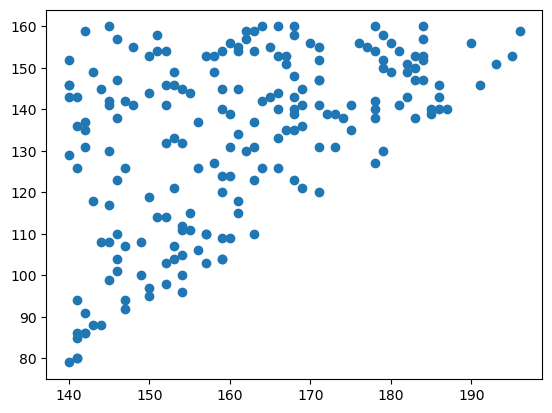

In [11]:
from matplotlib import pyplot as plt
# BMI 라벨 별 분포현황 시각화 
# 산점도 (scatter)

# 고도비만 데이터 시각화
EO = data.loc['Extreme Obesity']
plt.scatter(EO['Height'], EO['Weight'])
plt.show()


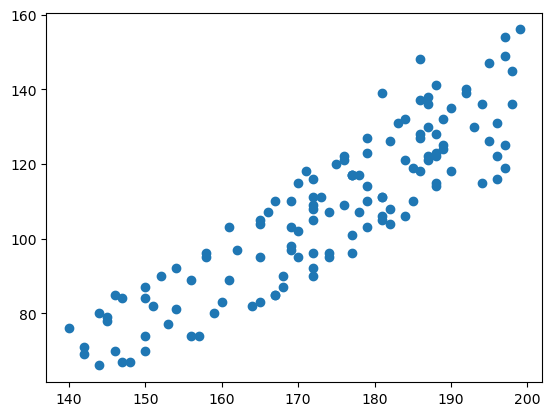

In [12]:
# 비만 데이터 시각화
ob = data.loc['Obesity']
plt.scatter(ob['Height'], ob['Weight'])
plt.show()

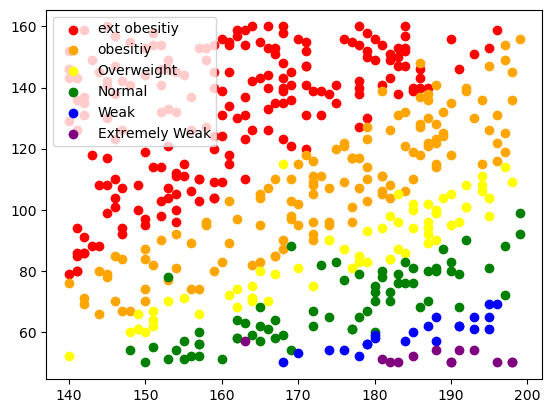

In [13]:
# 한눈에 봐야쥐...
# ['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak', 'Extremely Weak']
EO = data.loc['Extreme Obesity']
plt.scatter(EO['Height'], EO['Weight'], label='ext obesitiy', c='red')

ob = data.loc['Obesity']
plt.scatter(ob['Height'], ob['Weight'], label='obesitiy', c='orange')

ov = data.loc['Overweight']
plt.scatter(ov['Height'], ov['Weight'], label='Overweight', c='yellow')

no = data.loc['Normal']
plt.scatter(no['Height'], no['Weight'], label='Normal', c='green')

we = data.loc['Weak']
plt.scatter(we['Height'], we['Weight'], label='Weak', c='blue')

ew = data.loc['Extremely Weak']
plt.scatter(ew['Height'], ew['Weight'], label='Extremely Weak', c='purple')

# 범례표시
plt.legend()
plt.show()

In [15]:
# 반복된 작업을 간결하게 작성 -> 함수
def graph_draw(label, color):
    dlabel = data.loc[label]
    plt.scatter(dlabel['Height'], dlabel['Weight'], label=label, c=color)


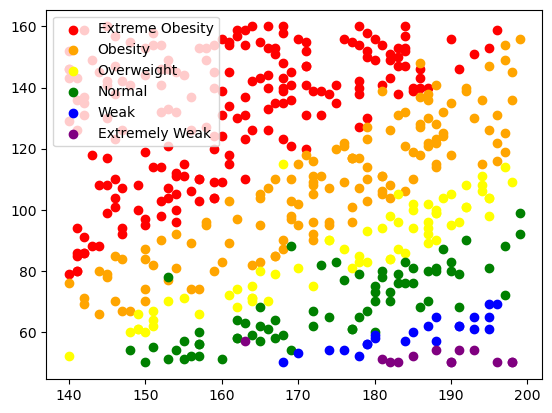

In [22]:
label = ['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak', 'Extremely Weak']
color = ['red', 'orange','yelow','green','blue','purple']
graph_draw('Extreme Obesity', 'red')
graph_draw('Obesity','orange')
graph_draw('Overweight','yellow')
graph_draw('Normal','green')
graph_draw('Weak','blue')
graph_draw('Extremely Weak','purple')
plt.legend()

plt.show()

In [ ]:
# 탐색적 데이터 분석을 통해 데이터들의 분포 확인
# 노랑 데이터 하나가 주황색에 가깝게 위치 -> 한개니까 그냥 두고 진행
# 정확도가 낮다면 다시 전처리를 통해 제거

Obesity, red
Normal, orange
Overweight, yellow
Extreme Obesity, green
Weak, blue
Extremely Weak, purple


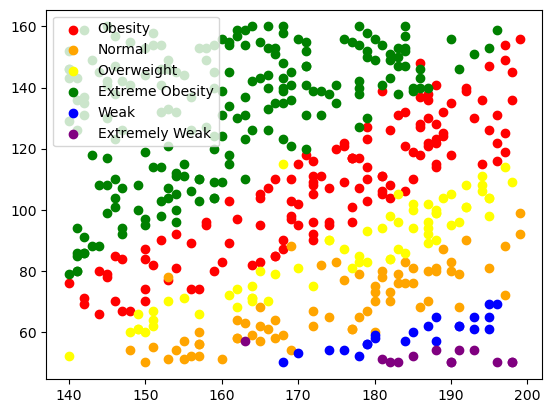

In [42]:
lab = data.index.unique()
color = ['red', 'orange','yellow','green','blue','purple']
i = 0
for l in lab:
    print(l + ", " + color[i])
    graph_draw(l, color[i])
    i+=1
plt.legend()
plt.show()

### 모델링
- 문제와 답데이터 분리
- 문제 데이터: 키, 몸무게
- 답데이터: 비만도(label)

In [32]:
# 데이터 세팅
# X (문제 데이터) : 키, 몸무게
# y (정답 데이터) : label == 비만도
X = data[['Height', 'Weight']]
y = data.index

# 잘 나눠졌는지 확인 --> 각각 X, y의 크기 확인
print('문제 데이터 : ', X.shape)
print('답 데이터 : ', y.shape)

# 문제 데이터 대문자 (feature는 여러개 일 수 있음)
# 문제 데이터 2차원 -> 대문자 X, 답데이터 1차원 -> 소문자 y
# 
# 확인!! 문제 데이터와 정답데이터의 개수가 같아야 한다!! 

문제 데이터 :  (500, 2)
답 데이터 :  (500,)


## train, test 데이터 분리 ( 7 : 3 )

In [48]:
# 훈련용 데이터셋 70% --> 350개 (0~349) 인덱스
X_train = X.iloc[:350,:]
y_train = y[:350]
print(X_train.shape, y_train.shape)

# 테이스용 데이터셋 30%
X_test=  X.iloc[350:,:]
y_test = y[350:]
print(X_test.shape, y_test.shape)

# 문제, 답 개수 일치, 특성 개수 확인
# feature 체크-> 2개

(350, 2) (350,)
(150, 2) (150,)


### 5. 모델 생성, 하이퍼 파라미터 결정

In [49]:
# 머신러닝을 도와주는 도구 불러오기
# KNN 분류모델
from sklearn.neighbors import KNeighborsClassifier
# 정확도 측정 도구
from sklearn.metrics import accuracy_score

In [59]:
# 모델 객체 생성
knn_model = KNeighborsClassifier(n_neighbors=5)

# 학습 X, 모델 선택 및 객체 생성만 진행 완료

### 6. 모델 학습


In [60]:
# 모델이름.fit(훈련용 문제,훈련용 답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
# 예측 -> 모델이름.prodict(테스트 문제)
pre = knn_model.predict(X_test)

# 예측값(정답X), 테스트용 정답과 비교하여 정확도 확인

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 7. 평가

In [62]:
# model 평가
# accuracy(예측 답 데이터, 실제 답)
accuracy_score(pre, y_test)

# 약 90% 정도의 정확도를 가짐
# 1에 가까울 수록 잘 맞힌것!

0.9066666666666666